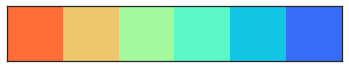

In [36]:
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import auc as calculate_auc
from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt
import seaborn as sns

from aggmap import AggMap, AggModel

np.random.seed(888) #just for reaptable results


color = sns.color_palette("rainbow_r", 6) #PiYG
sns.palplot(color)

In [37]:
data = load_breast_cancer()
dfx = pd.DataFrame(data.data, columns= data.feature_names)
y = pd.Series(data.target).map({0:'malignant', 1:'benign'})
dfy = pd.get_dummies(y)

In [38]:
X = dfx.values.astype(float)
Y = dfy.values.astype(float)

mp = AggMap(dfx, metric = 'correlation')

2020-10-25 19:02:15,158 - INFO - [bidd-aggmap] - Calculating distance ...
2020-10-25 19:02:15,158 - INFO - [bidd-aggmap] - the number of process is 16


100%|##########| 30/30 [00:00<00:00, 693.07it/s]


In [39]:
n_splits = 5 #5-fold reapeat 5 times
run_all = []

for repeat_seed in  [8, 16, 32, 64, 128]: #5 repeats random seeds 
    
    outer = KFold(n_splits = n_splits, shuffle = True, random_state = repeat_seed)
    outer_idx = list(outer.split(range(len(Y))))
    
    for c in [1, 3, 5]: 
        
        mp = mp.fit(cluster_channels = c, verbose = 0)
            
        for i, idx in enumerate(outer_idx):
            
            train_idx, valid_idx = idx
            fold_num = "fold_%s" % str(i+1).zfill(2) 
            
            validY = Y[valid_idx]
            validx = X[valid_idx]

            trainx = X[train_idx]
            trainY = Y[train_idx]

            trainX = mp.batch_transform(trainx, scale_method = 'standard')
            validX = mp.batch_transform(validx, scale_method = 'standard')
            print("\n input train and test X shape is %s, %s " % (trainX.shape,  validX.shape))
            clf = AggModel.MultiClassEstimator(epochs = 50, 
                                               batch_size = 8, gpuid = 6,
                                               metric = 'ACC',verbose = 0)
            clf.fit(trainX, trainY, X_valid = validX, y_valid = validY)

            history = clf.history.history
            history['fold'] = fold_num
            history['c'] = c
            history['repeat_seed'] = repeat_seed
            
            run_all.append(history)

  0%|          | 0/455 [00:00<?, ?it/s]

2020-10-25 19:02:16,876 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-10-25 19:02:16,945 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-10-25 19:02:16,950 - INFO - [bidd-aggmap] - Finished


100%|##########| 114/114 [00:00<00:00, 1088.20it/s]



 input train and test X shape is (455, 6, 5, 1), (114, 6, 5, 1) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1215.51it/s]



 input train and test X shape is (455, 6, 5, 1), (114, 6, 5, 1) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1403.09it/s]



 input train and test X shape is (455, 6, 5, 1), (114, 6, 5, 1) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 2647.20it/s]



 input train and test X shape is (455, 6, 5, 1), (114, 6, 5, 1) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 113/113 [00:00<00:00, 1430.69it/s]



 input train and test X shape is (456, 6, 5, 1), (113, 6, 5, 1) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


 24%|##3       | 108/455 [00:00<00:00, 1027.55it/s]

2020-10-25 19:04:04,062 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-10-25 19:04:04,131 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-10-25 19:04:04,138 - INFO - [bidd-aggmap] - Finished


100%|##########| 114/114 [00:00<00:00, 1104.89it/s]



 input train and test X shape is (455, 6, 5, 3), (114, 6, 5, 3) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1612.82it/s]



 input train and test X shape is (455, 6, 5, 3), (114, 6, 5, 3) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1099.28it/s]



 input train and test X shape is (455, 6, 5, 3), (114, 6, 5, 3) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1316.95it/s]



 input train and test X shape is (455, 6, 5, 3), (114, 6, 5, 3) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 113/113 [00:00<00:00, 1599.25it/s]



 input train and test X shape is (456, 6, 5, 3), (113, 6, 5, 3) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


 22%|##1       | 98/455 [00:00<00:00, 979.44it/s]

2020-10-25 19:05:49,423 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-10-25 19:05:49,492 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-10-25 19:05:49,502 - INFO - [bidd-aggmap] - Finished


100%|##########| 114/114 [00:00<00:00, 1265.11it/s]



 input train and test X shape is (455, 6, 5, 5), (114, 6, 5, 5) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1121.58it/s]



 input train and test X shape is (455, 6, 5, 5), (114, 6, 5, 5) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1281.80it/s]



 input train and test X shape is (455, 6, 5, 5), (114, 6, 5, 5) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1051.26it/s]



 input train and test X shape is (455, 6, 5, 5), (114, 6, 5, 5) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 113/113 [00:00<00:00, 1231.55it/s]



 input train and test X shape is (456, 6, 5, 5), (113, 6, 5, 5) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


 28%|##8       | 128/455 [00:00<00:00, 1156.59it/s]

2020-10-25 19:07:35,235 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-10-25 19:07:35,302 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-10-25 19:07:35,308 - INFO - [bidd-aggmap] - Finished


100%|##########| 114/114 [00:00<00:00, 1505.28it/s]



 input train and test X shape is (455, 6, 5, 1), (114, 6, 5, 1) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1111.31it/s]



 input train and test X shape is (455, 6, 5, 1), (114, 6, 5, 1) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1316.01it/s]



 input train and test X shape is (455, 6, 5, 1), (114, 6, 5, 1) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1182.34it/s]



 input train and test X shape is (455, 6, 5, 1), (114, 6, 5, 1) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 113/113 [00:00<00:00, 1294.31it/s]



 input train and test X shape is (456, 6, 5, 1), (113, 6, 5, 1) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


 14%|#4        | 64/455 [00:00<00:00, 638.74it/s]

2020-10-25 19:09:19,783 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-10-25 19:09:19,853 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-10-25 19:09:19,860 - INFO - [bidd-aggmap] - Finished


100%|##########| 114/114 [00:00<00:00, 1331.76it/s]



 input train and test X shape is (455, 6, 5, 3), (114, 6, 5, 3) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1280.99it/s]



 input train and test X shape is (455, 6, 5, 3), (114, 6, 5, 3) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1448.19it/s]



 input train and test X shape is (455, 6, 5, 3), (114, 6, 5, 3) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1456.43it/s]



 input train and test X shape is (455, 6, 5, 3), (114, 6, 5, 3) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 113/113 [00:00<00:00, 1118.34it/s]



 input train and test X shape is (456, 6, 5, 3), (113, 6, 5, 3) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


 28%|##8       | 128/455 [00:00<00:00, 1091.61it/s]

2020-10-25 19:11:05,114 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-10-25 19:11:05,181 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-10-25 19:11:05,190 - INFO - [bidd-aggmap] - Finished


100%|##########| 114/114 [00:00<00:00, 1271.44it/s]



 input train and test X shape is (455, 6, 5, 5), (114, 6, 5, 5) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1178.05it/s]



 input train and test X shape is (455, 6, 5, 5), (114, 6, 5, 5) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1075.97it/s]



 input train and test X shape is (455, 6, 5, 5), (114, 6, 5, 5) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1160.91it/s]



 input train and test X shape is (455, 6, 5, 5), (114, 6, 5, 5) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 113/113 [00:00<00:00, 1286.30it/s]



 input train and test X shape is (456, 6, 5, 5), (113, 6, 5, 5) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


 24%|##3       | 108/455 [00:00<00:00, 1044.18it/s]

2020-10-25 19:12:50,525 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-10-25 19:12:50,591 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-10-25 19:12:50,596 - INFO - [bidd-aggmap] - Finished


100%|##########| 114/114 [00:00<00:00, 1220.71it/s]



 input train and test X shape is (455, 6, 5, 1), (114, 6, 5, 1) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1410.92it/s]



 input train and test X shape is (455, 6, 5, 1), (114, 6, 5, 1) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1272.74it/s]



 input train and test X shape is (455, 6, 5, 1), (114, 6, 5, 1) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1150.64it/s]



 input train and test X shape is (455, 6, 5, 1), (114, 6, 5, 1) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 113/113 [00:00<00:00, 1173.36it/s]



 input train and test X shape is (456, 6, 5, 1), (113, 6, 5, 1) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


 45%|####4     | 204/455 [00:00<00:00, 1899.46it/s]

2020-10-25 19:14:35,116 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-10-25 19:14:35,183 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-10-25 19:14:35,189 - INFO - [bidd-aggmap] - Finished


100%|##########| 114/114 [00:00<00:00, 1188.41it/s]



 input train and test X shape is (455, 6, 5, 3), (114, 6, 5, 3) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1326.44it/s]



 input train and test X shape is (455, 6, 5, 3), (114, 6, 5, 3) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1422.09it/s]



 input train and test X shape is (455, 6, 5, 3), (114, 6, 5, 3) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1282.72it/s]



 input train and test X shape is (455, 6, 5, 3), (114, 6, 5, 3) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 113/113 [00:00<00:00, 1394.92it/s]



 input train and test X shape is (456, 6, 5, 3), (113, 6, 5, 3) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


 28%|##8       | 128/455 [00:00<00:00, 1216.64it/s]

2020-10-25 19:16:20,538 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-10-25 19:16:20,605 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-10-25 19:16:20,614 - INFO - [bidd-aggmap] - Finished


100%|##########| 114/114 [00:00<00:00, 1156.76it/s]



 input train and test X shape is (455, 6, 5, 5), (114, 6, 5, 5) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1085.53it/s]



 input train and test X shape is (455, 6, 5, 5), (114, 6, 5, 5) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1068.68it/s]



 input train and test X shape is (455, 6, 5, 5), (114, 6, 5, 5) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1101.59it/s]



 input train and test X shape is (455, 6, 5, 5), (114, 6, 5, 5) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 113/113 [00:00<00:00, 1073.31it/s]



 input train and test X shape is (456, 6, 5, 5), (113, 6, 5, 5) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


 28%|##8       | 128/455 [00:00<00:00, 1244.27it/s]

2020-10-25 19:18:06,886 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-10-25 19:18:06,955 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-10-25 19:18:06,961 - INFO - [bidd-aggmap] - Finished


100%|##########| 114/114 [00:00<00:00, 1241.38it/s]



 input train and test X shape is (455, 6, 5, 1), (114, 6, 5, 1) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1413.00it/s]



 input train and test X shape is (455, 6, 5, 1), (114, 6, 5, 1) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1172.15it/s]



 input train and test X shape is (455, 6, 5, 1), (114, 6, 5, 1) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1110.81it/s]



 input train and test X shape is (455, 6, 5, 1), (114, 6, 5, 1) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 113/113 [00:00<00:00, 1479.78it/s]



 input train and test X shape is (456, 6, 5, 1), (113, 6, 5, 1) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


  0%|          | 0/455 [00:00<?, ?it/s]

2020-10-25 19:19:52,603 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-10-25 19:19:52,674 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-10-25 19:19:52,682 - INFO - [bidd-aggmap] - Finished


100%|##########| 114/114 [00:00<00:00, 1653.65it/s]



 input train and test X shape is (455, 6, 5, 3), (114, 6, 5, 3) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1424.42it/s]



 input train and test X shape is (455, 6, 5, 3), (114, 6, 5, 3) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1260.68it/s]



 input train and test X shape is (455, 6, 5, 3), (114, 6, 5, 3) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1191.69it/s]



 input train and test X shape is (455, 6, 5, 3), (114, 6, 5, 3) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 113/113 [00:00<00:00, 1693.12it/s]



 input train and test X shape is (456, 6, 5, 3), (113, 6, 5, 3) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


  0%|          | 0/455 [00:00<?, ?it/s]

2020-10-25 19:21:39,063 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-10-25 19:21:39,133 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-10-25 19:21:39,143 - INFO - [bidd-aggmap] - Finished


100%|##########| 114/114 [00:00<00:00, 1131.55it/s]



 input train and test X shape is (455, 6, 5, 5), (114, 6, 5, 5) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1245.27it/s]



 input train and test X shape is (455, 6, 5, 5), (114, 6, 5, 5) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1083.38it/s]



 input train and test X shape is (455, 6, 5, 5), (114, 6, 5, 5) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1068.02it/s]



 input train and test X shape is (455, 6, 5, 5), (114, 6, 5, 5) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 113/113 [00:00<00:00, 1453.42it/s]



 input train and test X shape is (456, 6, 5, 5), (113, 6, 5, 5) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


 37%|###6      | 168/455 [00:00<00:00, 1567.98it/s]

2020-10-25 19:23:24,960 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-10-25 19:23:25,027 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-10-25 19:23:25,033 - INFO - [bidd-aggmap] - Finished


100%|##########| 114/114 [00:00<00:00, 1313.18it/s]



 input train and test X shape is (455, 6, 5, 1), (114, 6, 5, 1) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1263.48it/s]



 input train and test X shape is (455, 6, 5, 1), (114, 6, 5, 1) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1264.73it/s]



 input train and test X shape is (455, 6, 5, 1), (114, 6, 5, 1) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1198.10it/s]



 input train and test X shape is (455, 6, 5, 1), (114, 6, 5, 1) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 113/113 [00:00<00:00, 1171.37it/s]



 input train and test X shape is (456, 6, 5, 1), (113, 6, 5, 1) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


 23%|##3       | 106/455 [00:00<00:00, 968.71it/s]

2020-10-25 19:25:10,196 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-10-25 19:25:10,264 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-10-25 19:25:10,271 - INFO - [bidd-aggmap] - Finished


100%|##########| 114/114 [00:00<00:00, 1454.04it/s]



 input train and test X shape is (455, 6, 5, 3), (114, 6, 5, 3) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1282.63it/s]



 input train and test X shape is (455, 6, 5, 3), (114, 6, 5, 3) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1424.08it/s]



 input train and test X shape is (455, 6, 5, 3), (114, 6, 5, 3) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1484.35it/s]



 input train and test X shape is (455, 6, 5, 3), (114, 6, 5, 3) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 113/113 [00:00<00:00, 1413.42it/s]



 input train and test X shape is (456, 6, 5, 3), (113, 6, 5, 3) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


  0%|          | 0/455 [00:00<?, ?it/s]

2020-10-25 19:26:55,273 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-10-25 19:26:55,341 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-10-25 19:26:55,350 - INFO - [bidd-aggmap] - Finished


100%|##########| 114/114 [00:00<00:00, 1428.94it/s]



 input train and test X shape is (455, 6, 5, 5), (114, 6, 5, 5) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1216.41it/s]



 input train and test X shape is (455, 6, 5, 5), (114, 6, 5, 5) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1062.36it/s]



 input train and test X shape is (455, 6, 5, 5), (114, 6, 5, 5) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 114/114 [00:00<00:00, 1629.14it/s]



 input train and test X shape is (455, 6, 5, 5), (114, 6, 5, 5) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


100%|##########| 113/113 [00:00<00:00, 1278.77it/s]



 input train and test X shape is (456, 6, 5, 5), (113, 6, 5, 5) 
MultiClassEstimator(batch_size=8, epochs=50, gpuid='6', metric='ACC')


In [40]:
dfr = pd.DataFrame(run_all)
dfr.to_csv('./5FCV_valid.csv')

In [41]:
sns.set(style = 'white', font_scale=1.8)

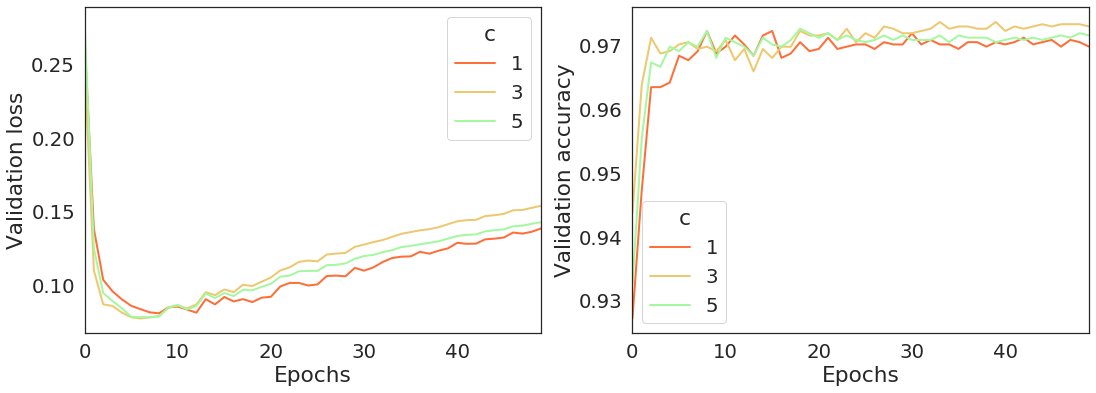

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,6), sharex=False, sharey=False, )
ax1, ax2 = axes        


col = 'val_loss'
loss_mean = dfr.groupby(['c']).agg({col: lambda x:x.tolist()})[col].apply(lambda x: np.array(x).mean(axis=0)).apply(pd.Series).T
loss_std = dfr.groupby(['c']).agg({col: lambda x:x.tolist()})[col].apply(lambda x: np.array(x).std(axis=0)).apply(pd.Series).T
loss_mean.head(50).plot(ax=ax1, lw = 2, color = color) # ,ylim = (-2.55, -2) 
ax1.set_ylabel('Validation loss')
ax1.set_xlabel('Epochs')


col = 'val_accuracy'
acc_mean = dfr.groupby(['c']).agg({col: lambda x:x.tolist()})[col].apply(lambda x: np.array(x).mean(axis=0)).apply(pd.Series).T
acc_std = dfr.groupby(['c']).agg({col: lambda x:x.tolist()})[col].apply(lambda x: np.array(x).std(axis=0)).apply(pd.Series).T
acc_mean.head(50).plot(ax=ax2, lw = 2, color = color)
ax2.set_ylabel('Validation accuracy')
ax2.set_xlabel('Epochs')


plt.savefig('5FCV_valid.png', bbox_inches='tight', dpi=300)

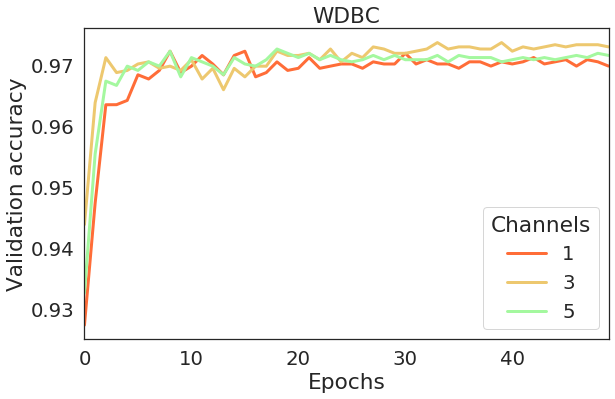

In [43]:
sns.set(style = 'white', font_scale=1.8)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9,6), sharex=False, sharey=False, )
ax2 = axes        

col = 'val_accuracy'
acc_mean = dfr.groupby(['c']).agg({col: lambda x:x.tolist()})[col].apply(lambda x: np.array(x).mean(axis=0)).apply(pd.Series).T
acc_std = dfr.groupby(['c']).agg({col: lambda x:x.tolist()})[col].apply(lambda x: np.array(x).std(axis=0)).apply(pd.Series).T


acc_mean.columns.name = 'Channels'
acc_std.columns.name = 'Channels'

acc_mean.plot(ax=ax2, lw = 3, color = color)
ax2.set_ylabel('Validation accuracy')
ax2.set_xlabel('Epochs')
plt.title('WDBC')
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3)
plt.savefig('5FCV_valid_acc.png', bbox_inches='tight', dpi=400)